In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import os

from keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Multiply, Subtract, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, Dropout, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda, Flatten, Convolution2D, MaxPooling2D, ZeroPadding2D, Reshape
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.utils import layer_utils
# from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

%matplotlib inline

from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform, he_normal
import scipy.misc
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K
K.set_image_data_format('channels_last') 
# K.set_learning_phase(1) 
import scipy
import cv2
from keras.layers import subtract
import keras
from keras.layers import Lambda
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam,RMSprop 

from tensorflow import image
from tensorflow.keras.utils import *

from PIL import Image,ImageOps

import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

RANDOM_SEED = 42
LABELS = ["genunine", "forged"]

2023-12-12 12:23:57.632043: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-12 12:23:57.683905: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 12:23:57.683936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 12:23:57.685160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 12:23:57.693557: I tensorflow/core/platform/cpu_feature_guar

In [2]:
SIZE=(220,155)
# input_shape=(155,230,3)

In [3]:
def preprocess(img_input):
	img_input=cv2.resize(img_input,SIZE,interpolation=cv2.INTER_LINEAR)

	# ------------------------------
	#Only black or white pixels
	bw_pixels = np.where(img_input < 128, 0, 255)
	bw_image = bw_pixels.reshape((155, 220))
	img_input = bw_image
	# Rescaling the intensity
	pmin, pmax = img_input.min(), img_input.max()
	if pmin == pmax or np.isnan(pmin) or np.isnan(pmax):
		rescaled_image = img_input  # or set it to a default value
	else:
		rescaled_image = 255 * (img_input - pmin) / (pmax - pmin)
	rescaled_pixels = rescaled_image.flatten()
	img_input = rescaled_pixels
	# ------------------------------

	img_input=img_input/255

	img_input = img_input.reshape(-1, SIZE[1], SIZE[0])

	return img_input

## Load Data

In [16]:
# org_list_1=[]
# for i in range(55):
#     p=[]
#     for j in range(24):
#         img_path = '/u/epw9kz/academic/first_year/ML/project/bonus/dataset/2_CEDAR/signatures/full_forg/forgeries_'+str(i+1) +'_' +str(j+1)+'.png'
#         img = load_img(img_path,target_size=(155,220), color_mode='grayscale') 
#         x = img_to_array(img)
#         if i == 0 and j == 0:
#             print('img x', x.shape)
#             break

img x (155, 220, 1)


In [4]:
# data augmantation
data_gen = ImageDataGenerator(
    rotation_range=15,  # Random rotation between -15 to +15 degrees
    width_shift_range=0.1,  # Randomly zoom image horizontally by 10%
    height_shift_range=0.1,  # Randomly zoom image vertically by 10%
    zoom_range=0.2,  # Randomly zoom image in and out by 20%
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

forg_list_1=[]
for i in range(55):
    p=[]
    for j in range(24):
        img_path = '/u/epw9kz/academic/first_year/ML_bonus/bonus/dataset/2_CEDAR/signatures/full_forg/forgeries_'+str(i+1) +'_' +str(j+1)+'.png'
        # img = load_img(img_path, color_mode = "grayscale", target_size=(155,220)) 
        img = load_img(img_path, color_mode = "grayscale", target_size=(155,220)) 
        x = img_to_array(img)
        x=preprocess(x)
        p.append(x)
    forg_list_1.append(p)

org_list_1=[]
for i in range(55):
    p=[]
    for j in range(24):
        img_path = '/u/epw9kz/academic/first_year/ML_bonus/bonus/dataset/2_CEDAR/signatures/full_org/original_'+str(i+1) +'_' +str(j+1)+'.png'
        img = load_img(img_path, color_mode = "grayscale", target_size=(155,220)) 
        x = img_to_array(img)
        x=preprocess(x)
        # print('x', x.shape)
        
        # x = np.expand_dims(x, axis=-1) # Reshape to 4D for compatibility with ImageDataGenerator
        # # print('x', x.shape)
        # it = data_gen.flow(x, batch_size=1) # Perform augmentation
        # batch = it.next()
        # image_augmented = batch[0]
        
        p.append(x)
    org_list_1.append(p)

print(len(forg_list_1))
print(len(org_list_1))

frauds = np.asarray(forg_list_1)
normal = np.asarray(org_list_1)

frauds = np.squeeze(frauds)
normal = np.squeeze(normal)

print(frauds.shape)
print(normal.shape)

frauds = frauds.reshape(-1, SIZE[1], SIZE[0])
normal = normal.reshape(-1, SIZE[1], SIZE[0])

print(frauds.shape)
print(normal.shape)

55
55
(55, 24, 155, 220)
(55, 24, 155, 220)
(1320, 155, 220)
(1320, 155, 220)


In [5]:
# frauds = np.asarray(forg_list_1)
# normal = np.asarray(org_list_1)

# print(frauds.shape)
# print(normal.shape)

# frauds = frauds.reshape(-1, SIZE[1], SIZE[0])
# normal = normal.reshape(-1, SIZE[1], SIZE[0])

# print(frauds.shape)
# print(normal.shape)

(55, 24, 34100)
(55, 24, 34100)
(1320, 155, 220)
(1320, 155, 220)


## Preparing the Data

### test data with only normal signs

In [84]:
working_X_train_frauds, reserved_X_test_frauds = train_test_split(frauds, test_size=0.95, random_state=RANDOM_SEED)
working_X_train_normal, reserved_X_test_normal = train_test_split(normal, test_size=0.15, random_state=RANDOM_SEED)

# preparing unseend test data (fraud + normal)
reserved_X_test = np.concatenate([reserved_X_test_frauds, reserved_X_test_normal])
frauds_length = len(reserved_X_test_frauds)
normal_length = len(reserved_X_test_normal)
reserved_y_test = np.concatenate([np.ones(frauds_length), np.zeros(normal_length)])

indices = np.arange(len(reserved_X_test))
np.random.shuffle(indices)
reserved_X_test = reserved_X_test[indices]
reserved_y_test = reserved_y_test[indices]

print('unseen test data', reserved_X_test.shape, reserved_y_test.shape)

# preparing train (only normal), test (only normal), validation (fraud + normal) data
X_valid_train_normal, X_test = train_test_split(working_X_train_normal, test_size=0.15, random_state=RANDOM_SEED)

X_valid_frauds = working_X_train_frauds
X_train, X_valid_normal = train_test_split(X_valid_train_normal, test_size=0.2, random_state=RANDOM_SEED)
print('--------******   valid dist', X_valid_frauds.shape, X_valid_normal.shape)

X_valid = np.concatenate([X_valid_frauds, X_valid_normal])
frauds_length = len(X_valid_frauds)
normal_length = len(X_valid_normal)
y_valid = np.concatenate([np.ones(frauds_length), np.zeros(normal_length)])

indices = np.arange(len(X_valid))
np.random.shuffle(indices)
X_valid = X_valid[indices]
y_valid= y_valid[indices]

print('train data', X_train.shape)
print('validation data', X_valid.shape, y_valid.shape)
print('test data', X_test.shape)

unseen test data (1452, 155, 220) (1452,)
--------******   valid dist (66, 155, 220) (191, 155, 220)
train data (762, 155, 220)
validation data (257, 155, 220) (257,)
test data (169, 155, 220)


### Test data with normal and forged signs

In [5]:
working_X_train_frauds, reserved_X_test_frauds = train_test_split(frauds, test_size=0.90, random_state=RANDOM_SEED)
working_X_train_normal, reserved_X_test_normal = train_test_split(normal, test_size=0.15, random_state=RANDOM_SEED)

# preparing unseend test data (fraud + normal)
reserved_X_test = np.concatenate([reserved_X_test_frauds, reserved_X_test_normal])
frauds_length = len(reserved_X_test_frauds)
normal_length = len(reserved_X_test_normal)
reserved_y_test = np.concatenate([np.ones(frauds_length), np.zeros(normal_length)])

indices = np.arange(len(reserved_X_test))
np.random.shuffle(indices)
reserved_X_test = reserved_X_test[indices]
reserved_y_test = reserved_y_test[indices]

print('unseen test data', reserved_X_test.shape, reserved_y_test.shape)

# preparing train (only normal), test (fraud + normal), validation (fraud + normal) data
X_valid_frauds, X_test_frauds = train_test_split(working_X_train_frauds, test_size=0.40, random_state=RANDOM_SEED)
X_valid_train_normal, X_test_normal = train_test_split(working_X_train_normal, test_size=0.15, random_state=RANDOM_SEED)
print('--------******   test dist', X_test_frauds.shape, X_test_normal.shape)

X_test = np.concatenate([X_test_frauds, X_test_normal])
frauds_length = len(X_test_frauds)
normal_length = len(X_test_normal)
y_test = np.concatenate([np.ones(frauds_length), np.zeros(normal_length)])

indices = np.arange(len(X_test))
np.random.shuffle(indices)
X_test = X_test[indices]
y_test= y_test[indices]

X_train, X_valid_normal = train_test_split(X_valid_train_normal, test_size=0.2, random_state=RANDOM_SEED)
print('--------******   valid dist', X_valid_frauds.shape, X_valid_normal.shape)

X_valid = np.concatenate([X_valid_frauds, X_valid_normal])
frauds_length = len(X_valid_frauds)
normal_length = len(X_valid_normal)
y_valid = np.concatenate([np.ones(frauds_length), np.zeros(normal_length)])

indices = np.arange(len(X_valid))
np.random.shuffle(indices)
X_valid = X_valid[indices]
y_valid= y_valid[indices]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
reserved_X_test = reserved_X_test.reshape(reserved_X_test.shape[0], reserved_X_test.shape[1], reserved_X_test.shape[2], 1)

print('train data', X_train.shape)
print('validation data', X_valid.shape, y_valid.shape)
print('test data', X_test.shape, y_test.shape)

unseen test data (1386, 155, 220) (1386,)
--------******   test dist (53, 155, 220) (169, 155, 220)
--------******   valid dist (79, 155, 220) (191, 155, 220)
train data (762, 155, 220, 1)
validation data (270, 155, 220, 1) (270,)
test data (222, 155, 220, 1) (222,)


## Building the Model

### dense NN

In [32]:
input_dim = X_train.shape[1:]
flattened_input_shape = np.prod(input_dim)  
encoding_dim = 14

input_layer = Input(shape=input_dim)

flattened_layer = Flatten()(input_layer)

encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(flattened_layer)
encoder = Dense(int(encoding_dim / 2), activation="tanh", activity_regularizer=regularizers.l1(10e-5))(encoder)
# encoder = Dense(int(encoding_dim / 4), activation="tanh", activity_regularizer=regularizers.l1(10e-5))(encoder)
# encoder = Dense(int(encoding_dim / 8), activation="relu", activity_regularizer=regularizers.l1(10e-5))(encoder)

# decoder = Dense(int(encoding_dim / 4), activation='tanh')(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
# decoder = Dense(encoding_dim, activation='tanh')(decoder)
decoder = Dense(flattened_input_shape, activation='relu')(decoder)

output_layer = Reshape(input_dim)(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

### conv NN

In [6]:
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, UpSampling2D, Cropping2D
from keras.models import Model
from keras import regularizers

input_dim = X_train.shape[1:]
input_layer = Input(shape=input_dim)
encoding_dim = 16

# Encoder
x = Conv2D(encoding_dim, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = UpSampling2D((2, 2))(encoded)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(encoding_dim, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(input_dim[-1], (3, 3), activation='sigmoid', padding='same')(x)
decoded = Cropping2D(cropping=((0, 1), (0, 0)))(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.summary()

2023-12-12 12:26:38.010590: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 155, 220, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 155, 220, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 78, 110, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 110, 8)        1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 39, 55, 8)         0         
 g2D)                                                            
                                                                 
 up_sampling2d (UpSampling2  (None, 78, 110, 8)        0     

In [7]:
nb_epoch = 50
batch_size = 64

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error'
                    # metrics=['accuracy']
                    )

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(
                        # log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/50
12/12 [==============================] - 7s 352ms/step - loss: 0.2598 - val_loss: 0.1859
Epoch 2/50


/u/epw9kz/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 4s 320ms/step - loss: 0.1008 - val_loss: 0.0251
Epoch 3/50
12/12 [==============================] - 4s 323ms/step - loss: 0.0180 - val_loss: 0.0168
Epoch 4/50
12/12 [==============================] - 4s 321ms/step - loss: 0.0160 - val_loss: 0.0166
Epoch 5/50
12/12 [==============================] - 4s 326ms/step - loss: 0.0159 - val_loss: 0.0166
Epoch 6/50
12/12 [==============================] - 4s 321ms/step - loss: 0.0159 - val_loss: 0.0166
Epoch 7/50
12/12 [==============================] - 4s 320ms/step - loss: 0.0159 - val_loss: 0.0166
Epoch 8/50
12/12 [==============================] - 4s 320ms/step - loss: 0.0159 - val_loss: 0.0166
Epoch 9/50
12/12 [==============================] - 4s 321ms/step - loss: 0.0159 - val_loss: 0.0166
Epoch 10/50
12/12 [==============================] - 4s 333ms/step - loss: 0.0159 - val_loss: 0.0165
Epoch 11/50
12/12 [==============================] - 4s 333ms/step - loss: 0.0159 - val_loss: 0.0165
Epoch 12/

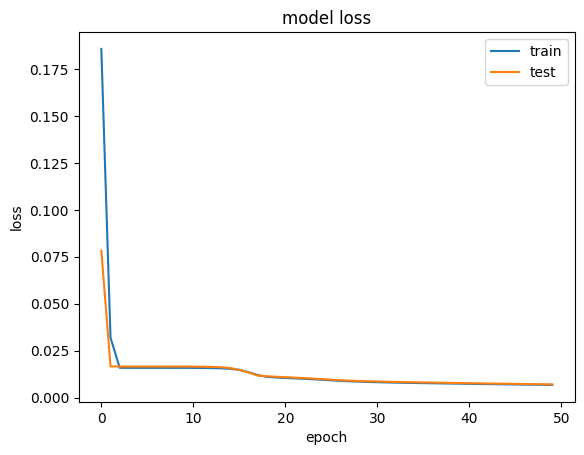

In [36]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

## Evaluation

In [29]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [30]:
predictions = autoencoder.predict(X_valid)
mse = np.mean(np.power(X_valid - predictions, 2), axis=(1, 2, 3))

print(np.min(mse), np.max(mse))

mse_min = np.min(mse)
mse_max = np.max(mse)

mse_scaled = (mse - mse_min) / (mse_max - mse_min)
mse = mse_scaled

# print(X_valid.shape)
# print(predictions.shape)
# print(y_valid.shape)
print(mse.max(), mse.min())

error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_valid})

error_df.describe()

9/9 [==============================] - 1s 46ms/step
2.7716553410587847e-07 0.0666856329154803
1.0 0.0


,reconstruction_error,true_class
count,270.000000,270.000000
mean,0.199124,0.292593
std,0.169894,0.455798
min,0.000000,0.000000
25%,0.091908,0.000000
50%,0.158093,0.000000
75%,0.260008,1.000000
max,1.000000,1.000000


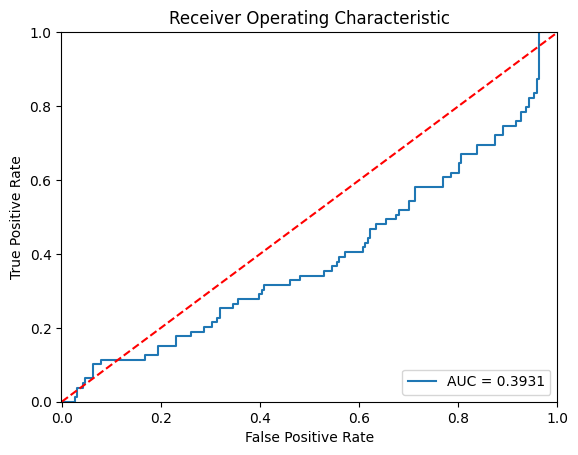

In [31]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
threshold_list = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4]
# threshold_list = [0.001, 0.005, 0.0075, 0.01]

for th in threshold_list:
    threshold = th
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.true_class, y_pred)

    recall = recall_score(error_df.true_class, y_pred)

    # print('threshold', threshold, 'recall', recall)

    TN, FP, FN, TP = conf_matrix.ravel()
    FAR = FP / (FP + TN)

    print('threshold', threshold, "False Acceptance Rate (FAR):", FAR)
    # print(conf_matrix)
    # plt.figure(figsize=(12, 12))
    # sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    # plt.title("Confusion matrix")
    # plt.ylabel('True class')
    # plt.xlabel('Predicted class')
    # plt.show()

threshold 0.05 False Acceptance Rate (FAR): 0.9797979797979798
threshold 0.1 False Acceptance Rate (FAR): 0.9545454545454546
threshold 0.2 False Acceptance Rate (FAR): 0.696969696969697
threshold 0.25 False Acceptance Rate (FAR): 0.5454545454545454
threshold 0.3 False Acceptance Rate (FAR): 0.41919191919191917
threshold 0.4 False Acceptance Rate (FAR): 0.22727272727272727


## Performance on Unseen Data

44/44 [==============================] - 2s 50ms/step
threshold 0.05 recall 0.8762626262626263
[[   4  194]
 [ 147 1041]]


Text(0.5, 14.722222222222216, 'Predicted class')

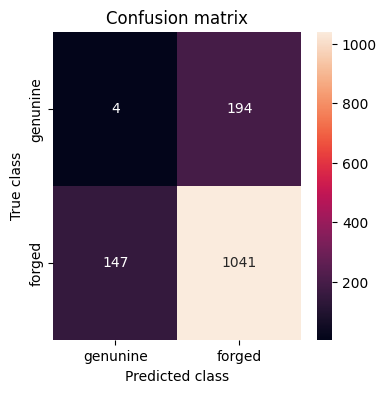

In [20]:
predictions = autoencoder.predict(reserved_X_test)
mse = np.mean(np.power(reserved_X_test - predictions, 2), axis=(1, 2, 3))

# print(np.min(mse), np.max(mse))

mse_min = np.min(mse)
mse_max = np.max(mse)

mse_scaled = (mse - mse_min) / (mse_max - mse_min)
mse = mse_scaled

# print(X_valid.shape)
# print(predictions.shape)
# print(y_valid.shape)
# print(mse.max(), mse.min())

error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': reserved_y_test})

threshold = 0.05
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

recall = recall_score(error_df.true_class, y_pred)
print('threshold', threshold, 'recall', recall)

TN, FP, FN, TP = conf_matrix.ravel()
FAR = FP / (FP + TN)

# print("False Acceptance Rate (FAR):", FAR)
print(conf_matrix)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
# plt.show()